In [1]:
from pynq import Overlay
import iotSDR.iotSDR_streams as SDR
import iotSDR.iotSDR_defs as channels

import matplotlib.pyplot as plt
plt.style.use(['dark_background'])

iot_overlay = Overlay('../bitstream/iotSDR_IOT.bit',download=True)

In [2]:
iotSDR = SDR.iotSDR_stream(iot_overlay)

rx_chan_1   = channels.chan_subGHz_A
rx_chan_2   = channels.chan_subGHz_B

#tx_chan   = iotSDR_defs.chan_24GHz_B
#rx_chan   = iotSDR_defs.chan_24GHz_A

## Setting iotSDR Frequency
- Center Frequency of the 

In [3]:
cent_frequency = 918e6  # channel carrier freq 
chan_spacing_kHz   = 25     # channel spacing w.r.t carrier freq
chan_number        = 1      # channel offset in multiple of channel spacing w.r.t carrier freq

iotSDR.setFrequency(rx_chan_1,cent_frequency,chan_spacing_kHz,chan_number)
iotSDR.setFrequency(rx_chan_2,cent_frequency,chan_spacing_kHz,chan_number)


iotSDR Device: frequency:918000 updated for channel:0 
iotSDR Device: frequency:918000 updated for channel:2 


In [4]:
rx_stream_1 = iotSDR.setupStream(channels.IOTSDR_RX,rx_chan_1)
rx_stream_2 = iotSDR.setupStream(channels.IOTSDR_RX,rx_chan_2)

#This turns the rf radio on
iotSDR.activateStream(rx_stream_1)
iotSDR.activateStream(rx_stream_2)

iotSDR Device: Channel: chan_subGHz_A stream setup 
iotSDR Device: Channel: chan_subGHz_B stream setup 


In [5]:
"""
Create continous memory buffer for ADC received samples
this buffer will be filled up by the streamed samples recieved from the RF chip
"""
from pynq import allocate
import numpy as np

totalSamples  = 1024*16
sample_buffer_1 = allocate(shape=(totalSamples*2,), dtype=np.int16)
sample_buffer_2 = allocate(shape=(totalSamples*2,), dtype=np.int16)


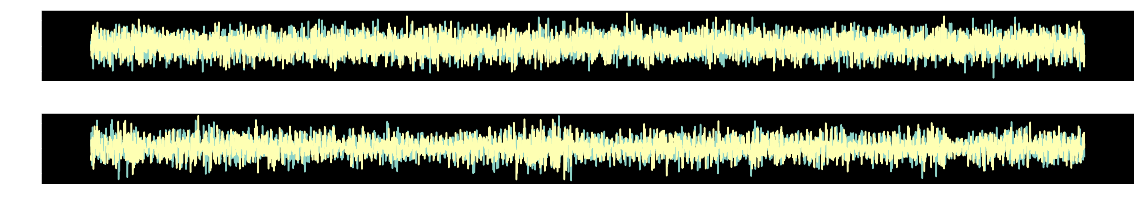

In [6]:
"""
samplesPerFrame = 2*4*1024
"""

total_frames = 1
iotSDR.readStream(rx_stream_1,sample_buffer_1)
iotSDR.readStream(rx_stream_2,sample_buffer_2)

frames_1 = sample_buffer_1[::2] + 1j * sample_buffer_1[1::2]
frames_2 = sample_buffer_2[::2] + 1j * sample_buffer_2[1::2]


N = len(frames_1.real)//1

fig, axes= plt.subplots(nrows=2, ncols=1,figsize=(16,3))
t = np.arange(0, N, 1)

axes[0].plot(t, frames_1.real)
axes[0].plot(t, frames_1.imag)
axes[1].plot(t, frames_2.real)
axes[1].plot(t, frames_2.imag)

plt.tight_layout()
plt.show()

In [7]:
sample_buffer_1.close()
sample_buffer_2.close()

In [8]:
iotSDR.deactivateStream(rx_stream_1)
iotSDR.deactivateStream(rx_stream_2)